In [8]:
## Decision Tree Classifier on Car Evaluation Dataset from  https://archive.ics.uci.edu/dataset/19/car+evaluation ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [9]:
# Fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# Data (as pandas dataframes) 
x = car_evaluation.data.features 
y = car_evaluation.data.targets 

# Change values to numerical
x.replace({'vhigh':4, 'high':3, 'med':2, 'low':1, 
           '5more': 5, 'more': 5, 
           'small': 1, 'medium': 2, 'big': 3}, inplace=True)

# Format settings to show more rows and columns when printing dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Show x an y data (uncomment to see)
#print (x.head())
#print(y.head())

C:\Users\ryanl\AppData\Local\Temp\ipykernel_3008\578442381.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x.replace({'vhigh':4, 'high':3, 'med':2, 'low':1,
C:\Users\ryanl\AppData\Local\Temp\ipykernel_3008\578442381.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.replace({'vhigh':4, 'high':3, 'med':2, 'low':1,


In [10]:
# Train/test split and decision tree classifier with a 70/30 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)

# Create Decision Tree with a speified depth
#clf = DecisionTreeClassifier(max_depth= 5, random_state=0)
clf = DecisionTreeClassifier(random_state=0) # no depth specified
clf.fit(x_train, y_train)

# Evaluate on test set
preds = clf.predict(x_test)
#print ("test accuracy:", accuracy_score(y_test, preds)) # Print test accuracy

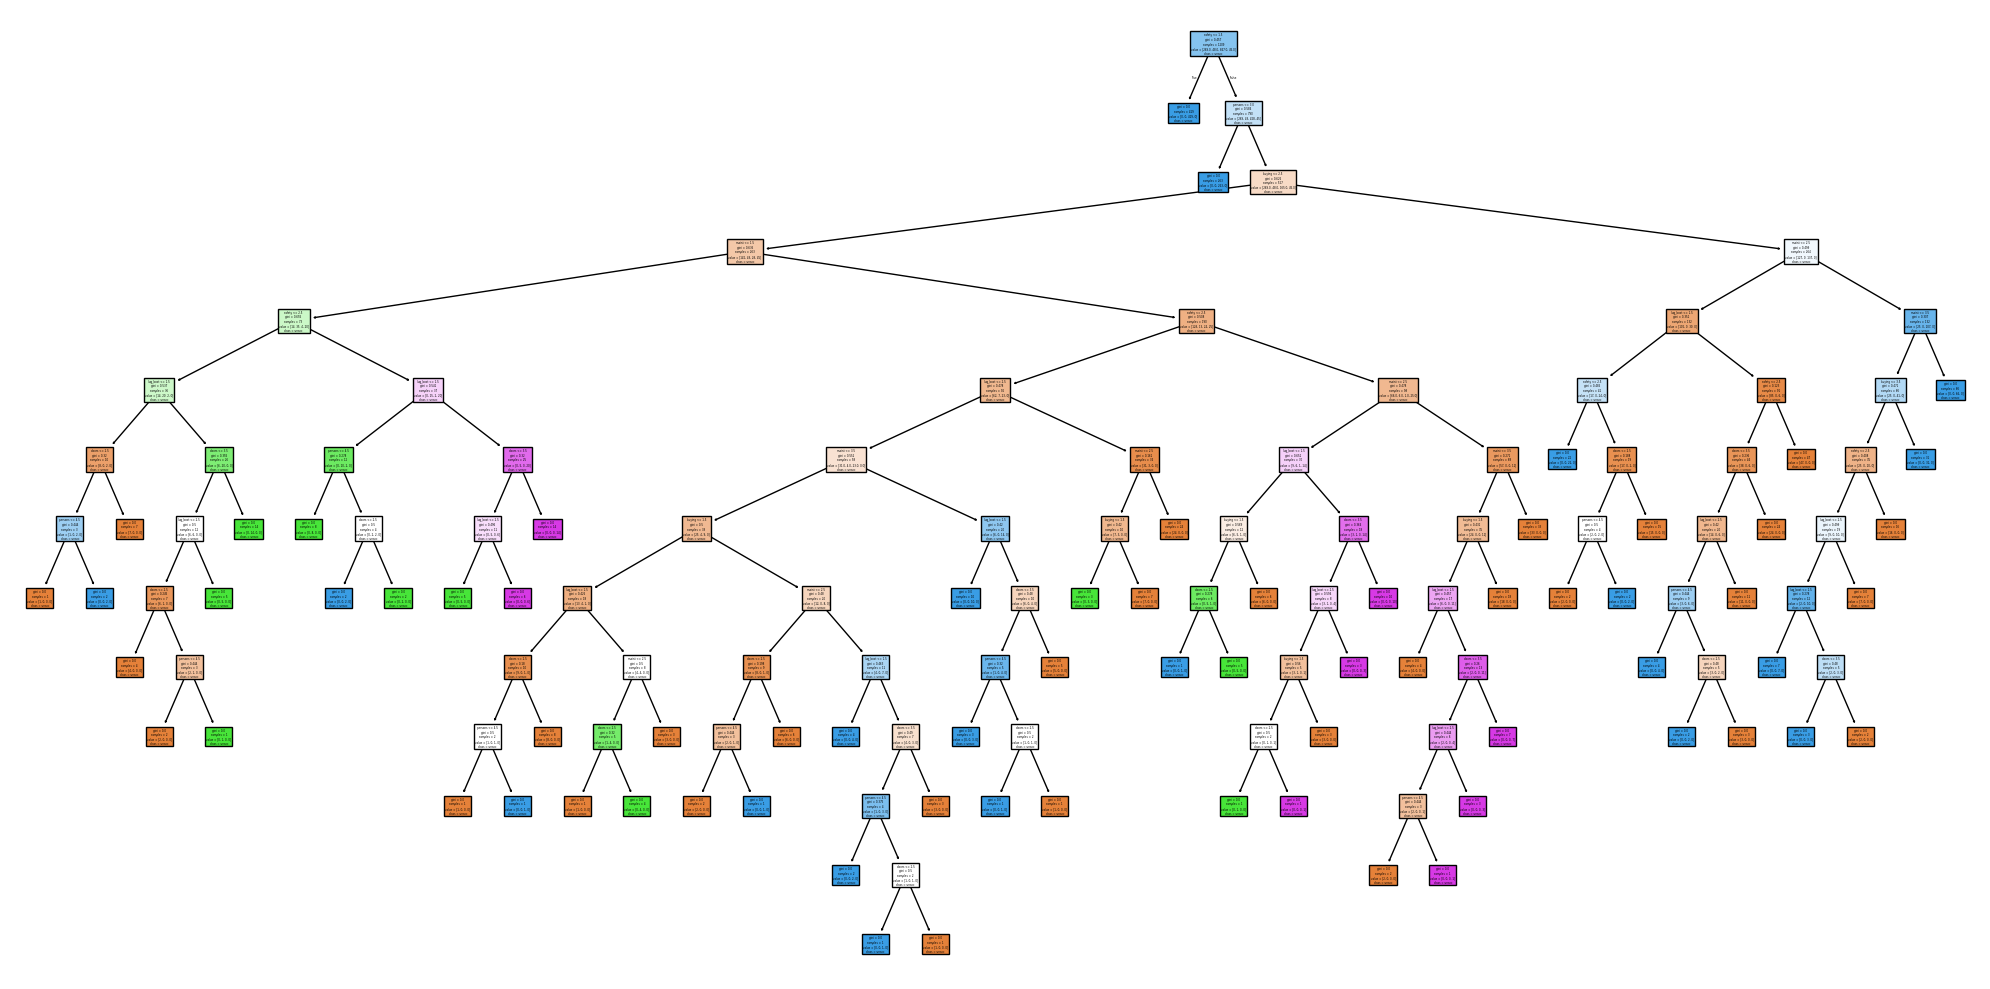

In [11]:
# Plot tree graphically
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=x.columns, class_names=y['class'].values, filled=True)
plt.tight_layout()
plt.show()

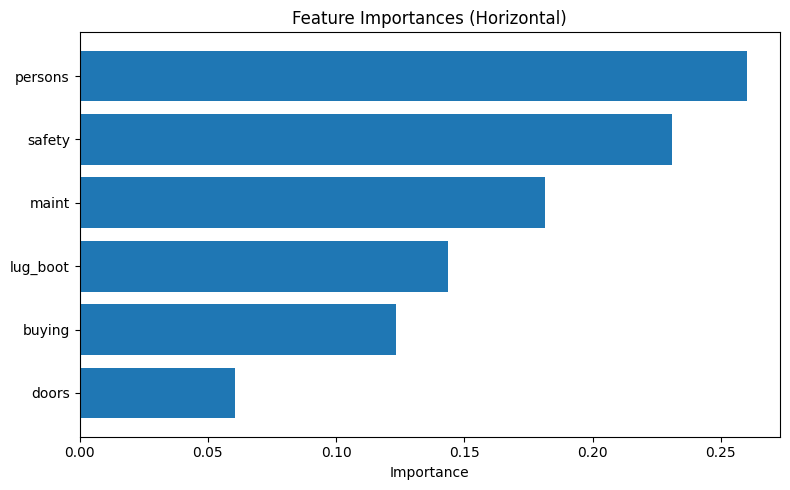

In [12]:
# Find feature importances
feature_names = x.columns
importances = clf.feature_importances_

# Create a DataFrame for readability
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

feat_imp = feat_imp.sort_values(by="Importance", ascending=True)
#print(feat_imp)

# Show feature importance graphically
feat_imp_nonzero = feat_imp[feat_imp["Importance"] > 0] # only include features that have some importance
plt.figure(figsize=(8,5))
plt.barh(feat_imp_nonzero["Feature"], feat_imp_nonzero["Importance"])

plt.xlabel("Importance")
plt.title("Feature Importances (Horizontal)")
plt.tight_layout()
plt.show()

#print (f"Most important features:{clf.feature_importances_}")

In [13]:
# Define cross-validation
kf = KFold(n_splits = 9, shuffle = True, random_state = 0)

# Cross-validate
cv_scores =  cross_val_score(clf, x, y, cv=kf)
print (f"Cross-Validation Scores:{cv_scores}")
print (f"Highest Score:{np.max(cv_scores)}")
print (f"Average Score:{np.mean(cv_scores)}")


Cross-Validation Scores:[0.95833333 0.99479167 0.984375   0.984375   0.984375   0.97916667
 0.984375   0.99479167 0.984375  ]
Highest Score:0.9947916666666666
Average Score:0.9832175925925924
